# ALGORITMA NAIVE BAYES PREDIKSI DIABETES
Margareta Valencia (A11.2022.14704)

link github : https://github.com/margaretavalen/Data-Mining/tree/main/Tugas5

## 1. Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

## 2. Import Dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[72 35]
 [66 29]
 [64  0]
 ...
 [72 23]
 [60  0]
 [70 31]]


In [4]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#untuk model Gaussian hilangkan kolom diskrit
dataset = pd.DataFrame(dataset.drop('Pregnancies',axis=1))
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [8]:
dataset.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Pembagian Dataset

In [9]:
# Membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

## 4. Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[-1.02605237  0.69644524]
 [-3.62767905 -1.30803161]
 [ 0.01459831  0.69644524]
 [-0.24556436 -1.30803161]
 [-3.62767905 -1.30803161]
 [ 0.74305378  1.26020435]
 [ 0.43085857  0.63380534]
 [-0.7658897  -1.30803161]
 [-0.9219873  -1.30803161]
 [-0.4536945  -1.30803161]
 [ 0.63898871 -1.30803161]
 [ 0.22272844  0.07004622]
 [ 0.22272844 -0.11787348]
 [ 0.22272844  1.19756445]
 [ 0.11866337  0.44588563]
 [-0.08946676  0.13268612]
 [-0.40166196 -1.30803161]
 [-3.62767905 -1.30803161]
 [ 0.63898871  0.63380534]
 [-0.7658897  -0.05523358]
 [-3.62767905 -1.30803161]
 [-0.2975969   1.00964474]
 [-0.08946676 -1.30803161]
 [-0.50572703  1.32284425]
 [ 0.43085857 -1.30803161]
 [-1.33824757 -0.05523358]
 [ 0.01459831  4.89331864]
 [ 0.32679351  0.50852553]
 [-0.19353183  0.13268612]
 [-0.40166196  0.44588563]
 [ 0.53492364  1.69868366]
 [ 0.53492364 -1.30803161]
 [-0.40166196 -1.30803161]
 [-0.08946676 -0.11787348]
 [-0.40166196 -1.30803161]
 [ 0.63898871 -1.30803161]
 [ 0.11866337  0.88436494]
 

In [12]:
print(X_test)

[[ 0.32679351  1.38548415]
 [ 0.22272844  0.57116543]
 [-0.40166196 -1.30803161]
 [ 0.11866337 -0.11787348]
 [-0.24556436 -1.30803161]
 [ 0.11866337 -0.18051338]
 [ 0.43085857  0.82172504]
 [ 0.84711884  0.38324573]
 [-0.6097921   0.19532603]
 [ 0.11866337  0.69644524]
 [ 0.32679351  0.94700484]
 [ 0.32679351  0.38324573]
 [ 0.22272844 -1.30803161]
 [-0.9219873   0.07004622]
 [ 0.11866337  0.13268612]
 [-0.08946676 -0.05523358]
 [ 0.11866337  1.32284425]
 [-1.02605237 -0.6816326 ]
 [ 0.84711884  0.63380534]
 [-0.81792223  0.44588563]
 [ 0.63898871  0.69644524]
 [ 0.53492364 -1.30803161]
 [-3.62767905  0.13268612]
 [ 0.63898871  0.44588563]
 [-0.19353183 -0.36843309]
 [-0.50572703  0.69644524]
 [ 0.32679351 -1.30803161]
 [ 0.95118391  1.00964474]
 [-0.19353183  0.07004622]
 [-0.08946676 -1.30803161]
 [ 0.22272844  0.32060583]
 [-0.2975969   1.57340386]
 [ 0.84711884 -0.24315328]
 [-0.9219873   1.38548415]
 [-0.81792223 -0.49371289]
 [-0.2975969  -1.30803161]
 [ 0.74305378  0.88436494]
 

## 5. Pelatihan Model Naive Bayes Pada Data Pelatihan

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## 6. Prediksi Hasil Data Pengujian

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6765799256505576


## 7. Evaluasi Model

In [16]:
# Menghitung dan menampilkan confusion matrix dan akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 
print("\nConfusion Matrix:")
print(cm)                                
print("\nAkurasi:", accuracy_score(y_test, y_pred))  


Confusion Matrix:
[[176   4]
 [ 83   6]]

Akurasi: 0.6765799256505576


## 8. Visualisasi Hasil Data Pelatihan

C:\Users\Acer\AppData\Local\Temp\ipykernel_53388\324515528.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


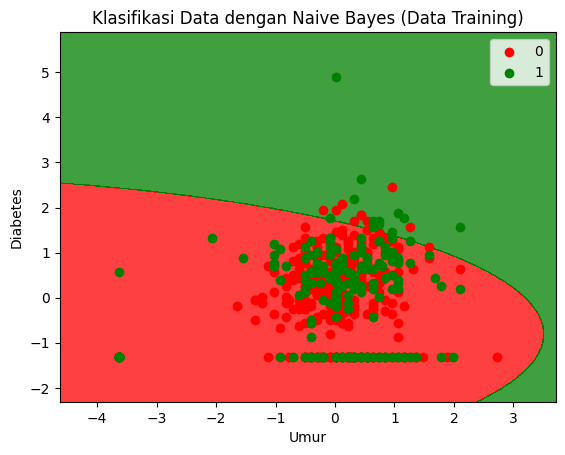

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Diabetes')
plt.legend()
plt.show()

## 9. Visualisasi Hasil Data Pengujian

C:\Users\Acer\AppData\Local\Temp\ipykernel_53388\369509195.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


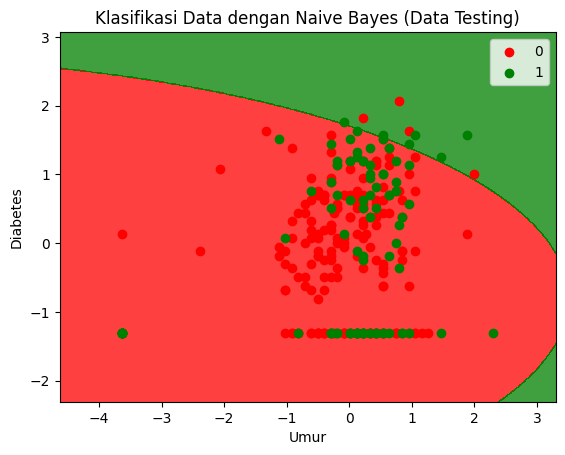

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Diabetes')
plt.legend()
plt.show()